In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
}
</style>
""")

# A Brief Practical Introduction to Machine-Learning Methods in Astronomy (Part 1)

By Tunde Akinsanmi

June 2020

Data volume and complexity in astronomy is continually increasing such that traditional methods to analyse data becomes challenging. e.g SDSS, Pan-STARRS, Kepler, ZTF, LSST, SKA,  ...

To tackle this, Astronomers are increasingly turning to machine learning (ML) to detect, characterize,   and  classify  objects  from complex  datasets  gathered  with different  facilities. Machine-learning methods constitute a diverse collection of data-driven algorithms designed to classify/characterize/analyze sources in multi-dimensional spaces.

Of course, ML is found in several applications today such as robotics, self-driving cars, search engines, Netflix, Natural language procession and translation etc. 

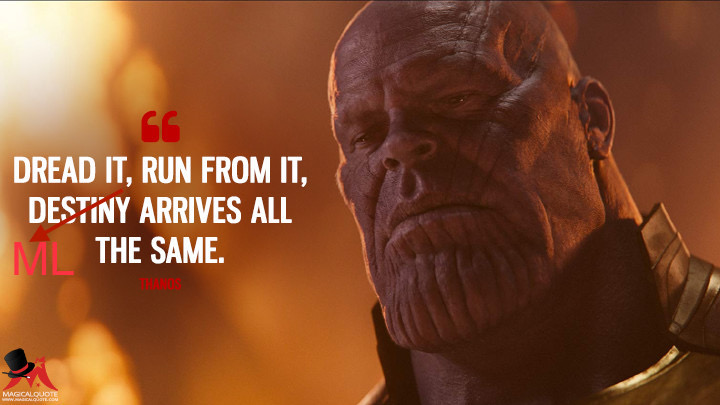

ML algorithms are divided into two groups:

- $\textbf{Unsupervised learning}$ -  aims to group or classify sources in the multidimensional feature space. There are no target labels provided to the algorithm so it has to find patterns by itself (hence the unsupervised). It is useful for clustering,  dimensionality  reduction,  and  anomaly  detection. 


- $\textbf{Supervised learning}$ - Learns to map a set  of  features  to  target labels based on examples of input-output pairs provided  by a  human  expert (hence, supervised). Once learnt, it can predict the output label of previously unseen data. It differs from model  fitting  techniques which has the model predefined. Supervised  learning algorithms construct the model according to the input  dataset even if the relationship between the input and output are  complex and non-linear. It is useful for classification and regression


The Scikit-learn python package is extremely useful for machine learning and we will use some of its algorithms. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Unsupervised learning algorithms

### Clustering

In [3]:
from sklearn import datasets
iris = datasets.load_iris()      #load iris toy data
iris.target_names                #type of irises

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

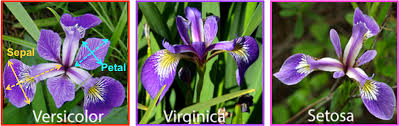

In [4]:
print(iris.feature_names)
print(iris.data[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


Text(0, 0.5, 'Sepal width')

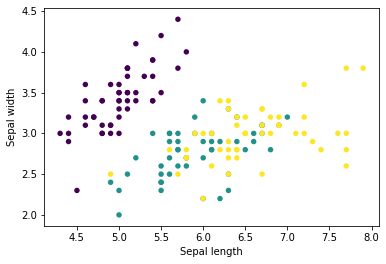

In [6]:
#plot data in plane of first two features (sepal length and width)

plt.scatter(iris.data[:,0], iris.data[:,1], c = iris.target, s = 30, edgecolor = "None", cmap = "viridis")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


visual inspection can distinguish 2 classes along this plane. can machine learning identify the clusters of data?

#### K-means: 

- Divide objects into k clusters
- Each cluster is defined by a centroid
- Each object is iteratively associated to the closest centroid (euclidean distance)

In [8]:
from sklearn.cluster import KMeans

In [9]:
Kcluster = KMeans(n_clusters = 2, init="k-means++", n_init = 20, random_state=5)#initialize Kmeans with 2 clusters
Kcluster.fit(iris.data)

Klabels = Kcluster.labels_               #label of the determined clusters
centroids = Kcluster.cluster_centers_        #centroid of the determined clusters 

Text(0, 0.5, 'sepal width')

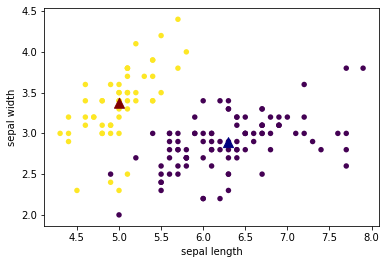

In [10]:
plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c = Klabels, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="jet")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'sepal width')

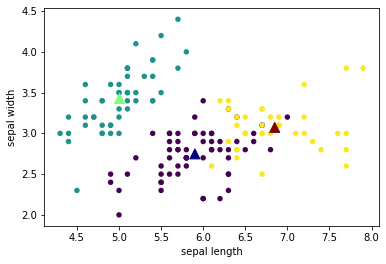

In [11]:
#using 3 clusters
Kcluster = KMeans(n_clusters = 3, init="k-means++", n_init = 20, random_state=3)    
Kcluster.fit(iris.data)

Klabels = Kcluster.labels_               #label of the determined clusters
centroids = Kcluster.cluster_centers_        #centroid coordinates of the determined clusters

plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c = Klabels, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2], marker='^', s=100, cmap="jet")

plt.xlabel('sepal length')
plt.ylabel('sepal width')



specifying 3 clusters seems to separate well the classes but without prior knowledge of the number of clusters,
even the two cluster solution would appear to be a good result. 

Although we wouldnt go into it here, it is possible to calculate a minimal cost function for different number of cluster used. So one can try different k's and select the one with the lowest cost. the cost can be obtained using "Kcluster.inertia_". For the above example we have 152 for k=2 and 78 for k=3 implying 3 clusters is a better solution.

Since k-means uses euclidean distance to cluster the points, the magnitude of each feature has a strong effect on the result. It is this useful to scale the features before performing clustering.

In [12]:
print("feature\t\t\tmean\tstd\tmin\tmax")
for featnum, feat in enumerate(iris.feature_names):
    print("{:s}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(feat, np.mean(iris.data[:,featnum]), 
                                                        np.std(iris.data[:,featnum]), np.min(iris.data[:,featnum]),
                                                        np.max(iris.data[:,featnum])))
    
print("\nPetal length has a higher range and so will have a stronger effect on the clustering")

feature			mean	std	min	max
sepal length (cm)	5.84	0.83	4.30	7.90
sepal width (cm)	3.06	0.43	2.00	4.40
petal length (cm)	3.76	1.76	1.00	6.90
petal width (cm)	1.20	0.76	0.10	2.50

Petal length has a higher range and so will have a stronger effect on the clustering


Text(0, 0.5, 'sepal width')

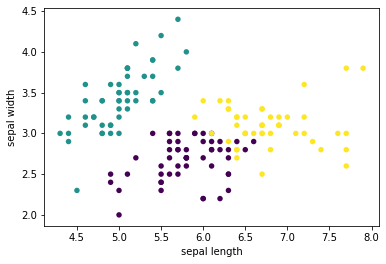

In [14]:
from sklearn.preprocessing import StandardScaler
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(iris.data)

Kcluster3 = KMeans(n_clusters = 3, n_init = 20, random_state=3)
Kcluster3.fit(scaler.transform(iris.data))   #perform clustering on the scaled data


plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c = Kcluster3.labels_, s = 30, edgecolor = "None", cmap = "viridis")

plt.xlabel('sepal length')
plt.ylabel('sepal width')



#### DBSCAN - Density-Based Spatial Clustering of Applications with Noise:

DBSCAN requires two parameters: minPts, the minimum number of points necessary for a cluster, and $\epsilon$, a distance measure. Clusters are grown by identifying core points, objects that have at least minPts located within a distance $\epsilon$. 

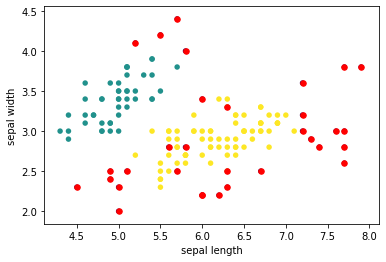

In [39]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.6, min_samples = 7)
dbs.fit(scaler.transform(iris.data)) # best to use re-scaled data since eps is in absolute units

dbs_outliers = dbs.labels_ == -1

plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c = dbs.labels_, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(iris.data[:,0][dbs_outliers], iris.data[:,1][dbs_outliers], s = 30, c = 'r')


plt.xlabel('sepal length')
plt.ylabel('sepal width');

DBSCAN could only detect 2 clusters in the iris data. The scattered points in red do not cluster around a point and is labeled as outliers. 
It doesn't mean the algorithm is not efficient but that no single algorithm works well in all cases

$\textbf{Let's try this clustering algorithms on planet data following}$ [Santos et al 2017](https://www.aanda.org/articles/aa/pdf/2017/07/aa30761-17.pdf)

In [40]:
import pandas as pd
#load data of planet properties from the paper.
dt=pd.read_csv("santos_short.csv",sep=",", header=None, names=["vmag", "Teff","logg","sma","feh","msun",
                                                              "mpl","P","e"] ) .dropna()

#condition according to Santos et al 2017
dt2=dt[(dt["mpl"]>=1) & (dt["mpl"]<15) & (dt["vmag"] <13) & (dt["Teff"] >= 4000) & (dt["Teff"] <= 6500) &
      (dt["P"]>=10) & (dt["P"]<365*5)]
dt2

,vmag,Teff,logg,sma,feh,msun,mpl,P,e
1,5.02,4255.0,1.80,1.54,-0.13,3.40,10.50,516.22,0.08
2,5.22,4709.0,2.44,0.83,-0.29,2.38,5.33,185.84,0
3,6.67,5311.0,4.42,2.77,0.43,0.95,4.64,1773.40,0.37
4,6.20,5772.0,4.40,1.68,0.08,1.00,1.68,799.50,0.69
5,5.52,5076.0,3.08,2.60,0.00,2.33,10.30,993.30,0.08
7,7.38,5069.0,3.40,1.33,-0.01,1.81,1.99,452.80,0.09
9,7.10,6284.0,4.35,1.00,0.12,1.22,9.88,335.10,0.29
11,5.79,4531.0,2.32,0.87,-0.19,2.51,7.10,269.30,0.43
12,4.83,4452.0,2.09,1.19,-0.41,2.77,3.88,479.10,0.38
13,5.10,5954.0,4.44,2.10,0.06,1.04,2.53,1078.00,0.03


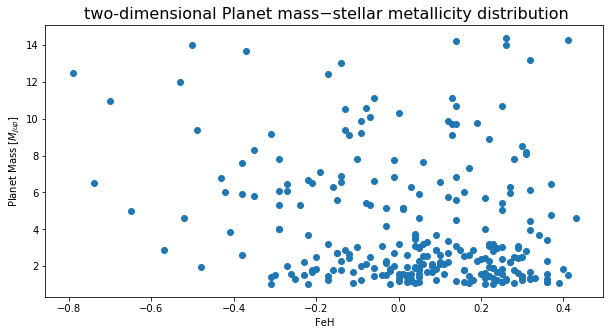

In [41]:
plt.figure(figsize=(10,5))

plt.scatter(dt2["feh"],dt2["mpl"])
plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]')
plt.title(" two-dimensional Planet mass−stellar metallicity distribution", fontsize=16);

In [42]:
feh_Mpl = dt2.filter(items=["feh","mpl"])

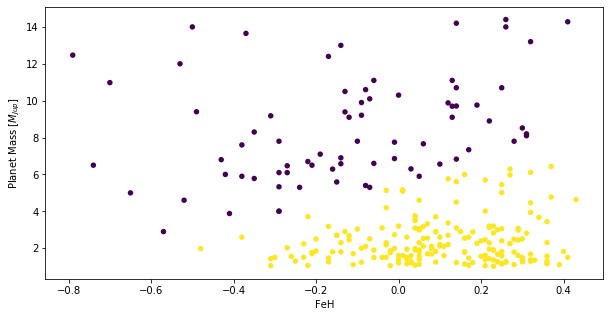

In [53]:
scaler_p = StandardScaler().fit(feh_Mpl)

planet_cluster = KMeans(n_clusters = 2, n_init = 100)
planet_cluster.fit(scaler_p.transform(feh_Mpl))   #perform clustering on the scaled data


plt.figure(figsize=(10,5))
plt.scatter(feh_Mpl["feh"], feh_Mpl["mpl"], c = planet_cluster.labels_, s = 30, edgecolor = "None", cmap = "viridis");

plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]');


The plot shows a clustering for planet masses below ∼$4M_{Jup}$ and metallicities above ∼ −0.3 dex in agreement with Santos et al 2017.

Let's try clustering using DBSCAN 


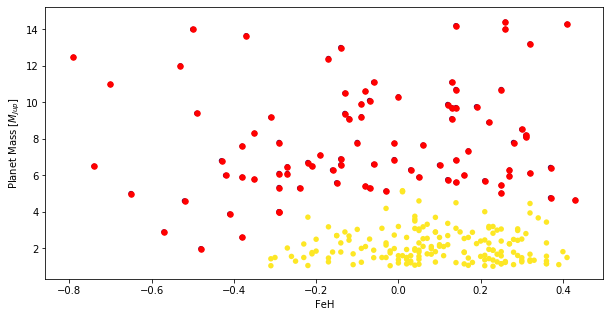

In [54]:
dbs = DBSCAN(eps = 0.5, min_samples = 25)
dbs.fit(scaler_p.transform(feh_Mpl)) 

dbs_outliers = dbs.labels_ == -1

plt.figure(figsize=(10,5))
plt.scatter(feh_Mpl["feh"], feh_Mpl["mpl"], c = dbs.labels_, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(feh_Mpl["feh"][dbs_outliers], feh_Mpl["mpl"][dbs_outliers], s = 30, c = 'r')

plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]');


Similar result. The main conclusion of the paper is that there is evidence for the existence of two separate populations of giant planets indicating that two different processes of formation are at play.

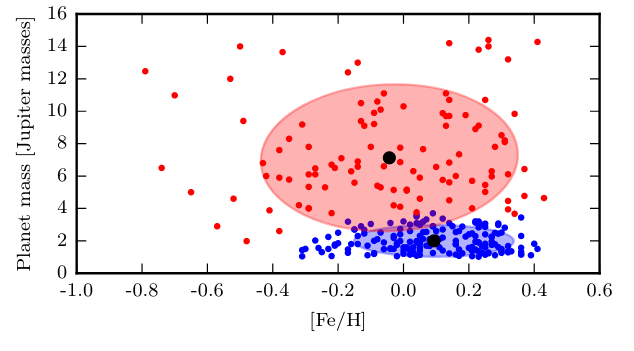

Fig 3 in [Santos et al 2017](https://doi.org/10.1051/0004-6361/201730761) showing two cluster population of planets in the planet mass vs stellar metallicity plane.

#### Gaussian Mixture Models:

attempts to find a mixture of Gaussian probability distributions of multi-dimensional that can best model the input dataset. It is can be used for clustering similar to Kmeans but more flexible in the sense that the cluster models are not necessarily circular around the centroids.

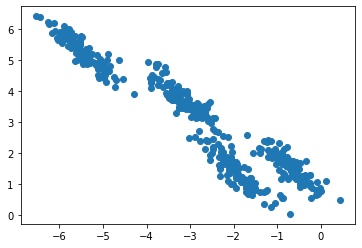

In [55]:
#this example and code was taken from 
#https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb

# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
sim_data = np.dot(X, rng.randn(2, 2))

plt.plot(sim_data[:,0], sim_data[:,1],"o")

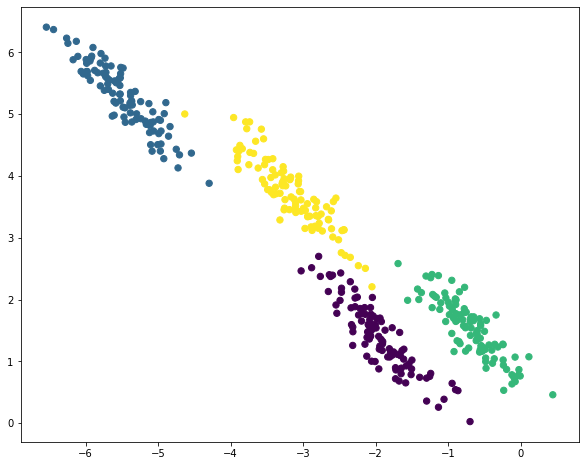

In [56]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(sim_data)
labels = gmm.predict(sim_data)

plt.figure(figsize=(10,8))
plt.scatter(sim_data[:, 0], sim_data[:, 1], c=labels, s=40, cmap='viridis');

since GMM is probabilistic model it gives the probability that any point belongs to the given cluster. 

In [60]:
proba=gmm.predict_proba(sim_data)
proba.round(2)

array([[0.  , 0.43, 0.  , 0.57],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 1.  , 0.  ],
       [0.45, 0.  , 0.  , 0.55],
       [0.  , 0.  , 1.  , 0.  ]])

One can always try different number of components and calculate the AIC or BIC (gmm.bic(sim_data). The model with the lowest BIC is preferred.

GMM is technically not a clustering model, but a generative probabilistic model for density estimation which describes the distribution of the data i.e. it gives us the recipe to generate new random data distributed similarly to our input. 

$\textbf{Let's try using GMM to find cluster in SDSS data }$

In [61]:
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 10000 
             p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
             p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
             p.petroRad_i, p.petroR50_i, p.deVAB_i
             FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
             WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
               """
SDSSgals = SDSS.query_sql(GALquery)
#SDSSgals

Text(0, 0.5, 'g-z')

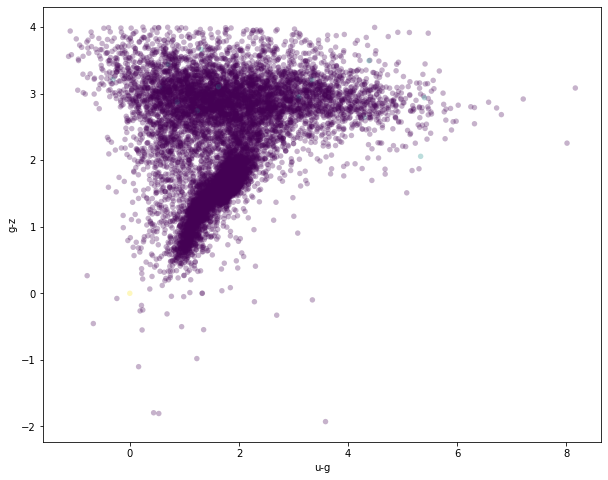

In [62]:
Xgal = np.array(SDSSgals.to_pandas())
#galScaler = StandardScaler().fit(Xgal)
Xgal=Xgal[Xgal[:,3]<4]

gal_gmm = GMM(n_components=3,covariance_type='full',max_iter=500, n_init=100).fit(Xgal)
labels = gal_gmm.predict(Xgal)


plt.figure(figsize = (10,8))
plt.scatter(Xgal[:,0], Xgal[:,3], c= labels, s = 30, edgecolor = "None", cmap = "viridis",alpha=0.3)
#plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2], marker='^', s=100, cmap="jet")
plt.xlabel("u-g")
plt.ylabel("g-z")


I wasn't able to identify clusters even though one can kinda see some structure that seems to separate star forming spiral galaxies to elliptical galaxies.

Maybe I am using the wrong set of features. This is why it is important to have domain knowledge while applying ML.

Moooving on ....

#### Hierarchical Clustering:

- Each point starts as its own cluster, then merged as one moves up the heirarchy

### Dimensionality Reduction

#### Principle Component Analysis (PCA):

can be used to perform dimensionality reduction of data to project it to a lower dimensional space while keeping the maximum variance in the dataset.

let's see an example in 2 dimension

Text(0, 0.5, 'y')

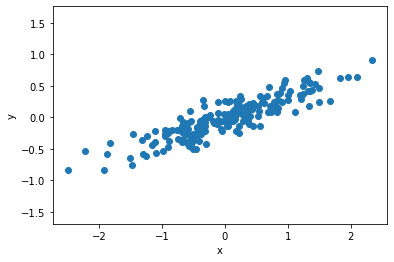

In [63]:
#this example was taken from 
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
rng = np.random.RandomState(1)
XY = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(XY[:, 0], XY[:, 1])
plt.axis('equal');
plt.xlabel("x")
plt.ylabel("y")

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(XY)

variance = pca.explained_variance_
print( "variance in the components: \n", variance)

# extract the components
components = pca.components_
print( "components(): \n", components)

pca_mean = pca.mean_
print( "mean: \n", pca_mean)


variance in the components: 
 [0.7625315 0.0184779]
components(): 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
mean: 
 [ 0.03351168 -0.00408072]


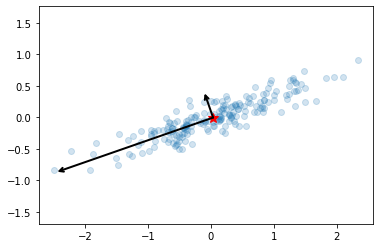

In [65]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(XY[:, 0], XY[:, 1], alpha=0.2)
for length, vector in zip(variance, components):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
plt.axis('equal');
plt.plot(pca_mean[0], pca_mean[1],"r*",ms=10)

The components define the direction of the vector and the variance is the square of the vector length in each axis. These vectors are the principal components of the data with the length indicating the signifance in describing the data.

For dimensionality reduction, the smallest principal components are removed therefore lowering the dimension of the data while preserving the greatest variance that can describe the data.

Let's reduce the dimension of this data from 2 to 1.

In [66]:
pca = PCA(n_components=1)
pca.fit(XY)
XY_pca = pca.transform(XY)
print("original shape:   ", XY.shape)
print("reduced shape:", XY_pca.shape)

original shape:    (200, 2)
reduced shape: (200, 1)


to compare the reduced data to the original, we can perform an inverse transform of the reduced and overplot on the original

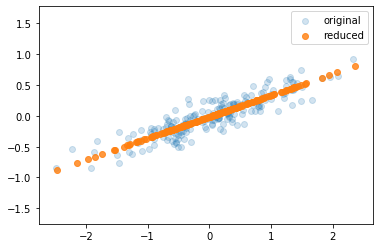

In [67]:
XY_reduced = pca.inverse_transform(XY_pca)
plt.scatter(XY[:, 0], XY[:, 1], alpha=0.2, label="original")
plt.scatter(XY_reduced[:, 0], XY_reduced[:, 1], alpha=0.8, label="reduced")
plt.axis('equal');
plt.legend()

we see that the information along the least important axis has been removed. The reduced data is a projection of the original data onto the axis with highest variance.

As PCA traces axis with highest variance, it is sensitive to outliers and so outlier removal should be performed before decomposition with PCA.

####  t-Distributed Stochastic Neighbor Embedding (t SNE):

non-linear dimensionality reduction technique that embeds high-dimensional data in a low dimensional space (2 - 3D). It is useful for visualizing complex datasets. 

similar objects are represented by nearby points, whereas dissimilar objects are represented by distant points, with a high probability

- assign distances between the objects in the sample (euclidean)
-  constructs a probability distribution over pairs of high-D objects with a scale term (perplexity) which determines how large the neighborhood of each object is.
- embeds the high-dimensional objects into a low dimensional space, such that the probability distribution
over pairs of points in the low-dimensional plane will be as similar as possible to the probability  distribution in the high-dimensional space.
- the axes of the low-D space is not interpretable in terms of any parameter of the objects.

Let's look at dimensionality reduction of stellar spectra.  We will create synthetic dataset that is composed of two stellar spectra, mixed with different weights. 

Example from [Baron 2019](https://arxiv.org/abs/1904.07248), [github codes](https://github.com/dalya/IAC_Winter_School_2018/blob/master/dim_reduction_pca_tsne.ipynb)

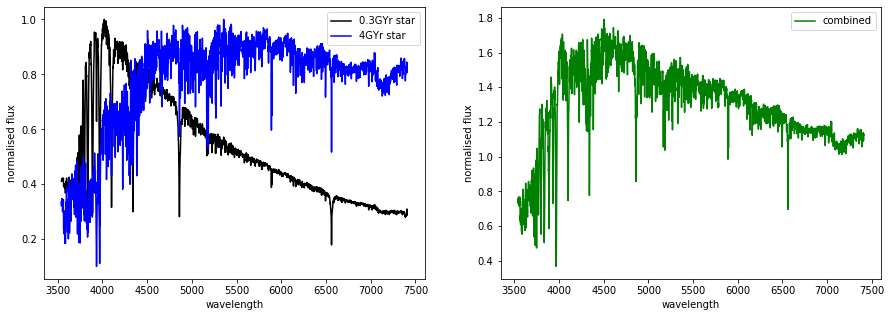

In [68]:
from astropy.io import fits
wavelength = np.arange(3540.5, 7409.6 + 0.9, 0.9)

# stellar spectra from Baron 2019
h1 = fits.open("Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits")   #0.3GYr star
spectrum1 = h1[0].data
spectrum1=spectrum1/np.max(spectrum1)

path2 = "Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits"    #4Gyr star
h2 = fits.open(path2)
spectrum2 = h2[0].data
spectrum2 = spectrum2/np.max(spectrum2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(wavelength, spectrum1, "k",label="0.3GYr star")
plt.plot(wavelength, spectrum2, "b", label="4GYr star")
plt.xlabel("wavelength")
plt.ylabel("normalised flux")
plt.legend()

plt.subplot(1,2,2)
plt.plot(wavelength, spectrum1+spectrum2, "g",label="combined")
plt.xlabel("wavelength")
plt.ylabel("normalised flux")
plt.legend()

In [69]:
def return_data_mixed_stars(N_obj):
    """
    function returns spectra which are a combination of two stellar spectra, with different weights
    in this function, the weights will sum up to 1
    """
    weights = np.linspace(0, 1, N_obj)
    
    spectra_list = []
    for i in range(N_obj):
        combined_spec = spectrum1 * weights[i] + spectrum2 * (1 - weights[i])
        spectra_list.append(combined_spec)
    spectra_list = np.array(spectra_list)
    return spectra_list

Each spectrum has 4300 flux values, and therefore 4300 features ordered by age. Purple represents old stellar populations whereas yellow represents young populations


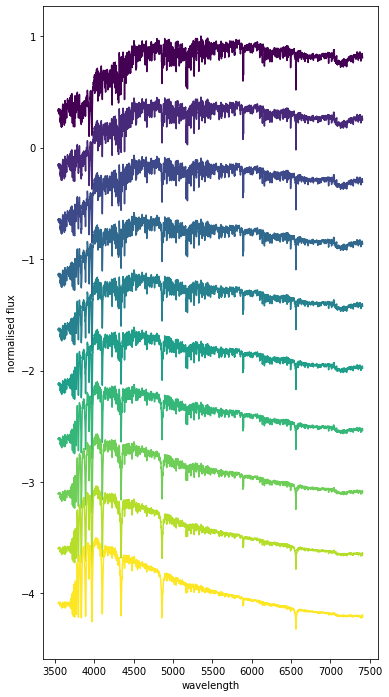

In [70]:
# create N spectra to play with, and plot them
import matplotlib as mpl
import matplotlib.cm as cm

N_obj = 10
spectra_list = return_data_mixed_stars(N_obj)
index = np.arange(N_obj)

# now plot them according to their index
norm = mpl.colors.Normalize(vmin=index[0], vmax=index[-1])
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)

plt.figure(figsize=(6, 12))

for i in range(N_obj):
    plt.plot(wavelength, spectra_list[i] - 0.5*i, color=m.to_rgba(i))

plt.xlabel("wavelength")
plt.ylabel("normalised flux");
print("Each spectrum has 4300 flux values, and therefore 4300 features ordered by age. Purple represents old stellar populations whereas yellow represents young populations")

(100, 4300)
(100, 2)


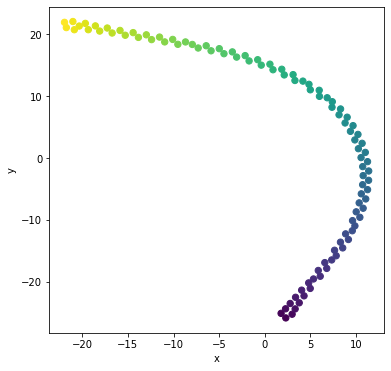

In [71]:
# now, we will increase the sample to 100 objects, and examine the output of tSNE
from sklearn.manifold import TSNE

N_obj = 100
spectra_list = return_data_mixed_stars(N_obj)
print(spectra_list.shape)
indices = np.arange(N_obj)

result = TSNE(perplexity=10.0, learning_rate=20.0, metric='euclidean', n_components=2).fit_transform(spectra_list)
print( result.shape)

x = result[:, 0]
y = result[:, 1]

plt.rcParams['figure.figsize'] = 6, 6
plt.scatter(x, y, c=indices, s=40)
plt.xlabel("x")
plt.ylabel("y");

While the dataset appears complex, it actually represents a one-dimensional manifold, where all the observed properties can be attributed to a change in a single parameter, the age.


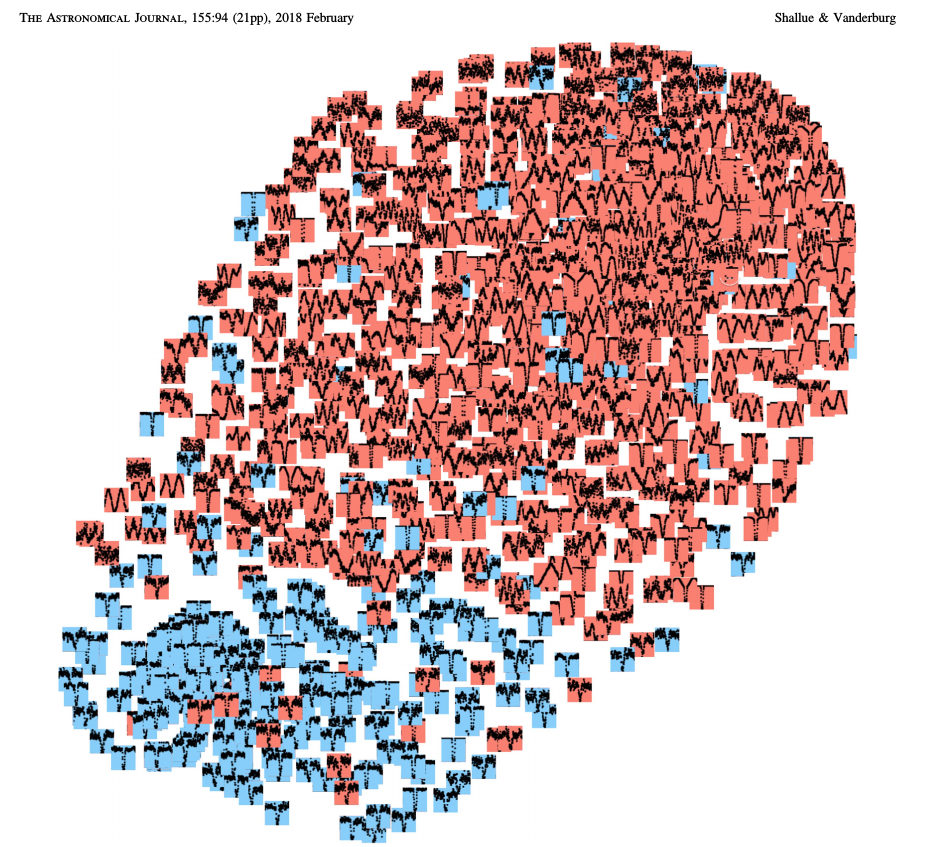

Fig 9 from [Shallue & Vanderburg 2018](https://doi.org/10.3847/1538-3881/aa9e09). Using tSNE to create a 2D representation of light curves such that planet candidates are closer each other and false positives to each other. 

## Supervised learning Algorithms

Recall used to learn the relationship between set of  measurements and target class. So needs to be trained on labeled data. 

For our training data we used labeled data from the [SDSS](http://www.sdss.org/) database with sources labeled either as stars or galaxies (confirmed from spectroscopic studies). Here we use 8 features $r$-band magnitude measurement made by SDSS which is only a small fraction of the total SDSS source features.

In [126]:
import seaborn as sns
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

STAR_GALquery = """SELECT TOP 20000
                p.psfMag_r, p.fiberMag_r, p.fiber2Mag_r, p.petroMag_r, 
                p.deVMag_r, p.expMag_r, p.modelMag_r, p.cModelMag_r, 
                s.class
                FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
                WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND s.class != 'QSO'
                ORDER BY p.objid ASC"""

stars_gals = SDSS.query_sql(STAR_GALquery)
stars_gals["class"]=np.array(stars_gals["class"], dtype=np.str)
stars_gals

/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


psfMag_r,fiberMag_r,fiber2Mag_r,petroMag_r,deVMag_r,expMag_r,modelMag_r,cModelMag_r,class
float64,float64,float64,float64,float64,float64,float64,float64,str6
18.50914,18.6587,19.34104,17.55135,17.32121,17.58728,17.58728,17.4931,GALAXY
19.03946,19.33727,19.82178,19.07113,19.04754,19.04397,19.04397,19.04397,STAR
19.89376,19.79181,20.47909,19.36626,19.19926,19.36779,19.36779,19.25845,GALAXY
22.04833,22.07411,22.69651,21.53075,21.04837,21.33033,21.33033,21.33033,GALAXY
21.57319,21.57904,22.22763,20.46425,19.93905,20.40421,20.40414,20.20997,GALAXY
18.67408,18.75905,19.37388,17.83968,17.70064,17.9051,17.70065,17.75864,GALAXY
20.19664,20.34542,20.9382,19.78261,19.64053,19.75468,19.75467,19.75468,GALAXY
19.42215,19.38944,20.16081,17.68282,17.1741,17.64558,17.64557,17.64558,GALAXY
18.89474,18.91774,19.5801,17.33765,17.03491,17.44135,17.03493,17.06851,GALAXY


In [127]:
#convert to pandas dataframe
sdss_df=stars_gals.to_pandas()

We can use a seaborn pairplot to see pairwise relationship of features in the dataset

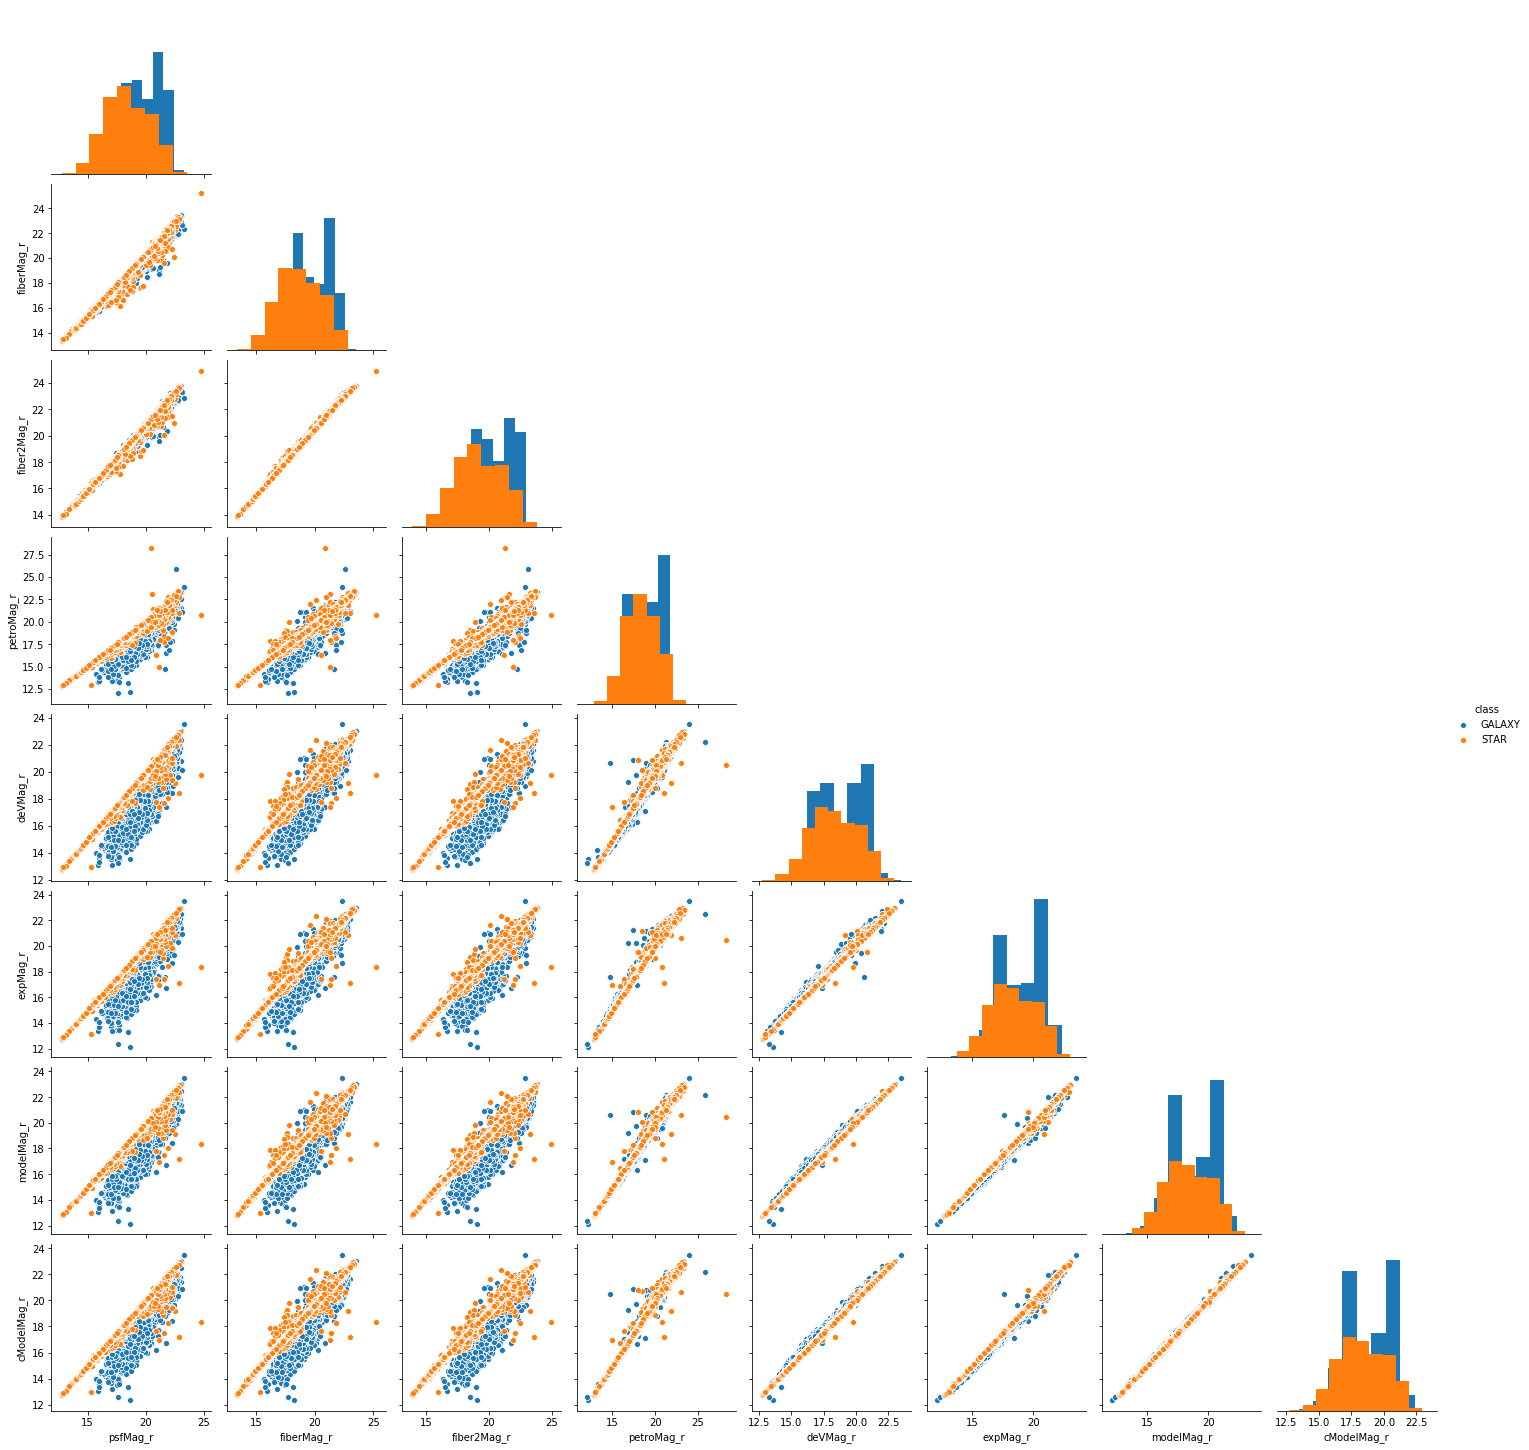

In [128]:
sns.pairplot(sdss_df, hue = 'class', diag_kind = 'hist', corner=True)

Features where star(orange) and galaxy(blue) histograms are well separated will be important for distinguishing them. Can you visualize any?

Create independent training and test set.

In [130]:
from sklearn.model_selection import train_test_split
rs = 1851

feats = list(sdss_df.columns)
feats.remove('class')

X = np.array(sdss_df[feats])                       #features
y = np.array(sdss_df['class'], dtype=np.str)       #target labels

#split the data into training set (70%) and test set(30%)
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.3, random_state = rs)

####  $k$-nearest-neighbors ([$k$NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)):

Is an simple algorithm used for classification and regression. It classifies data based on its proximity (typically euclidean) to $k$ other data points (nearest neighbors) irrespective of the feature the other points represent. It assigns a point to the category with the highest number of points. $k$ is user defined. e.g. if $k=5$ 
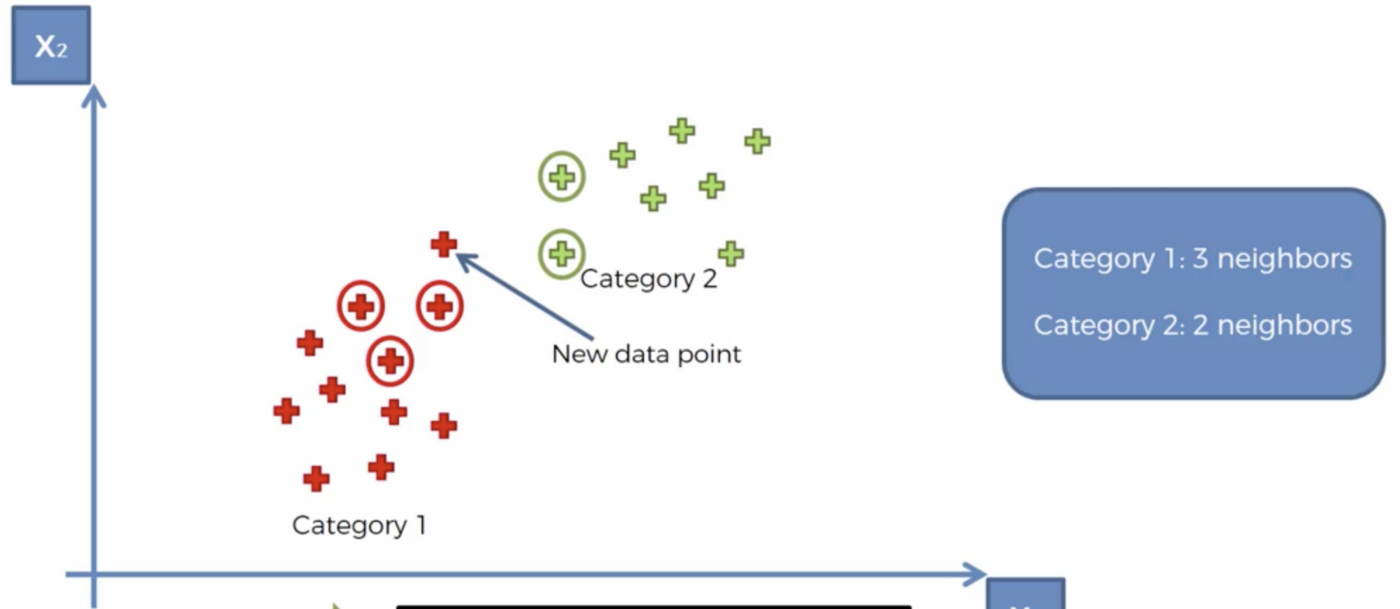

[image source](https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55)

Let's train a $k$NN model on the training set and evaluate its performance on previously unseen data in the test set

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf25 = KNeighborsClassifier(n_neighbors=25)
knn_clf25.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

Predict the traning set using the learnt model to see the accuracy of the model on training set. Use [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [148]:
from sklearn.metrics import accuracy_score

knn25_train_preds = knn_clf25.predict(train_X)
#compare the prediction to the actual target label in training set
print("knn25 Training accuracy = {:.4f}".format(accuracy_score(train_y, knn25_train_preds)))

knn25 Training accuracy = 0.9699


Cross validation can also be used to evaluate the model. Using [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), the ML model is separately trained on "cv" folds of the training data and then the accuracy of each training is evaluated on a different fraction of the training data. 

In [164]:
from sklearn.model_selection import cross_val_score

knn25_cv = cross_val_score(knn_clf25, train_X, train_y, cv=10)
#cross validation runs the model on 10 random subsets of the data and evaluates the accuracy of each subset.
#we can then take the mean of the accuracy scores of each subset 

print(knn25_cv)
print('\n The kNN model accuracy = {:.4f} +/- {:.4f}'.format(np.mean(knn25_cv), np.std(knn25_cv, ddof=1)))

[0.97359029 0.95931478 0.96642857 0.96857143 0.96714286 0.97214286
 0.97571429 0.97357143 0.96854896 0.96783417]

 The kNN model accuracy = 0.9693 +/- 0.0047


But how does one know the appropriate number of neighbors to use in for the $k$NN model?

You can run several models with different $k$ within cross_validation and compare the accuracy score

In [153]:
for k in [1,10,25,100]:
    knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors=k), train_X, train_y, cv=10)

    print('With k = {:d}, the kNN accuracy = {:.4f} +/- {:.4f}'.format(k, np.mean(knn_cv), np.std(knn_cv, ddof=1)))


With k = 1, the kNN accuracy = 0.9563 +/- 0.0039
With k = 10, the kNN accuracy = 0.9692 +/- 0.0049
With k = 25, the kNN accuracy = 0.9693 +/- 0.0047
With k = 100, the kNN accuracy = 0.9664 +/- 0.0051


We see k=25 gives the highest accuracy, so our knn25 model is optimal

Now to use our knn25 model to predict the target label of the previously unseen test data.

In [167]:
knn25_test_preds = knn_clf25.predict(test_X)

#compare the test prediction to the actual target label in test set (test_y)
print("knn25 accuracy on test set = {:.4f}".format(accuracy_score(test_y, knn25_test_preds)))

knn25 accuracy on test set = 0.9713


The [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can be used to visualize the accuracy of the classification on test set.

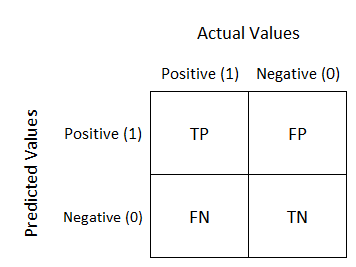
[image source](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

In [222]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, knn25_test_preds))
print("\nTotal sources in test set is composed of {0} galaxies and {1} stars = {2} sources,"
      .format(sum(test_y == "GALAXY"),sum(test_y == "STAR") ,len(test_y)))

[[3330  102]
 [  70 2498]]

Total sources in test set is composed of 3432 galaxies and 2568 stars = 6000 sources,


Note: accuracy = (TP+TN)/(total number of sources) = (3330+2498)/6000 = 0.9713

#### Random Forests ([RF](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))


Is an ensemble learning method for classification, regression where different decision trees are trained individually on different randomly-selected subsets of the original training set. Random subsets of the features are used to construct the conditions in individual nodes. 

The RF prediction is an aggregate of individual predictions of the trees in the forest, in the form of a majority vote. The number of trees for the estimation is user defined.

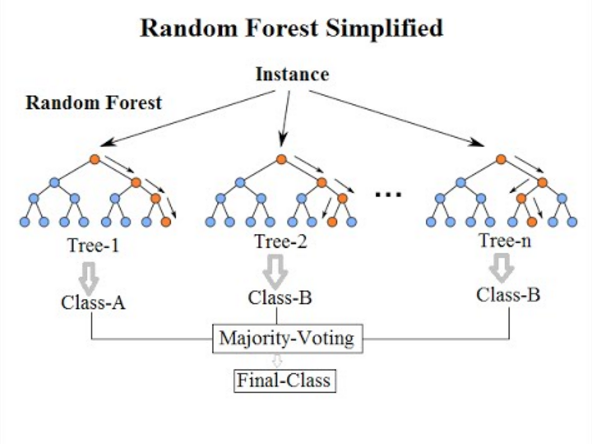
[image source](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)



Let's use an RF model to classify sources in the SDSS data as done previously

In [206]:
from sklearn.ensemble import RandomForestClassifier

rf_clf50 = RandomForestClassifier(n_estimators=50, random_state=rs, n_jobs=-1)
rf_clf50.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1851, verbose=0,
            warm_start=False)

RF additionally provides an estimate of the most important features in a model.

In [207]:
feat_str = ',\n'.join(['{}'.format(feat) for feat in np.array(feats)[np.argsort(rf_clf50.feature_importances_)[::-1]]])

print('From most to least important: \n{}'.format(feat_str))

From most to least important: 
psfMag_r,
fiber2Mag_r,
fiberMag_r,
deVMag_r,
cModelMag_r,
modelMag_r,
petroMag_r,
expMag_r


similar to steps taken with kNN, we evaluate the accuracy of the training

In [208]:
rf50_train_preds = rf_clf50.predict(train_X)
#compare the prediction to the actual target label in training set
print("rf50 Training accuracy = {:.4f}".format(accuracy_score(train_y, rf50_train_preds)))

rf50 Training accuracy = 0.9995


The training accuracy is higher than that obtained using kNN

Again, we can use cross validation to find the optimal number of trees

In [210]:
for ntree in [20,50,100,300]:    
    rf_cv = cross_val_score(RandomForestClassifier(n_estimators=ntree, random_state=rs, n_jobs=-1), train_X, train_y, cv=10)

    print('With {:d} trees the RF traning accuracy = {:.4f} +/- {:.4f}'.format(ntree, np.mean(rf_cv), np.std(rf_cv, ddof=1)))



With 20 trees the FoM = 0.9681 +/- 0.0050


/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


With 50 trees the FoM = 0.9694 +/- 0.0048
With 100 trees the FoM = 0.9697 +/- 0.0052
With 300 trees the FoM = 0.9701 +/- 0.0048


We can update the number of trees in our model to 300 or use 50 trees to predict the unseen test data. Predicting with 50 trees

In [215]:
rf50_test_preds = rf_clf50.predict(test_X)

#compare the test prediction to the actual target label in test set (test_y)
print("knn25 accuracy on test set = {:.4f}".format(accuracy_score(test_y, rf50_test_preds)))

knn25 accuracy on test set = 0.9717


In [220]:
print(confusion_matrix(test_y, rf50_test_preds))
print("\nTotal sources in test set is composed of {0} galaxies and {1} stars = {2} sources,"
      .format(sum(test_y == "GALAXY"),sum(test_y == "STAR"), len(test_y) ))

[[3341   91]
 [  79 2489]]

Total sources in test set is composed of 3432 galaxies and 2568 stars = 6000 sources,


The RF model predicts a bit better than the kNN model.

The SDSS has a [photometric classifier](https://www.sdss.org/dr12/algorithms/classify/#photo_class) which uses only 2 features to separate stars from galaxies

$psfMag_r - cModelMag_r > 0.145$. Sources that satisfy this are classified as galaxies.

Let's see how accurate this parametric model is in separating the test data in comparison to both our ML models,

In [230]:
phot_y=np.empty_like(test_y)

galx = test_X[:,0] - test_X[:,-1] > 0.145   #use criteria to select galaxies

phot_y[galx]= "GALAXY"        #assign galaxy class to the matched sources
phot_y[~galx] = "STAR"        #assign STAR class to the rest


print("The photometric classifier accuracy = {:.4f}".format(accuracy_score(test_y, phot_y)))

The photometric classifier accuracy = 0.9677


#### Neural Networks